# Session Objectives
- Introduction to Plotly
- Scatter Plots
- Line Charts
- Bar Plot
- Bubble Plot
- Box Plot
- Histograms
- Distplots
- Heatmaps

# 0. Installing Plotly
Use the Conda install plotly command. Visit the following link

https://anaconda.org/plotly/plotly

# 1. Introduction to Plotly
1. Until now we did visualisations using Matplotlib, Seaborn and Pandas. All of them produce static image files.

2. Plotly is company based out in Canada famous for it's products like Plotly and Dash

3. Plotly creates interactive visualisations in the form of HTML files

4. Drawback- can't work with a live data source

5. Dash is used to create live data based dashboards.

In [4]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as pyo

In [11]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

ipl=delivery.merge(match,left_on='match_id',right_on='id')
ipl.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


1. Scatter Plots



In [12]:
# Scatter plots are drawn between to continous variables
# Problem :- We are going to draw a scatter plot between Batsman Avg(X axis) and
# Batsman Strike Rate(Y axis) of the top 50 batsman in IPL(All time)

In [13]:
# Avg vs SR graph of Top 50 batsman(in terms of total runs)

# Fetching a new dataframe with Top 50 batsman
top50=ipl.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(50).index.tolist()
new_ipl = ipl[ipl['batsman'].isin(top50)]

In [16]:
# Calculating SR
# SR=[(number of runs scored)/(number of balls played)]*100
runs=new_ipl.groupby('batsman')['batsman_runs'].sum()
balls=new_ipl.groupby('batsman')['batsman_runs'].count()

sr=(runs/balls)*100

sr = sr.reset_index()
sr

,batsman,batsman_runs
0,AB de Villiers,145.129059
1,AC Gilchrist,133.054662
2,AJ Finch,126.299213
3,AM Rahane,117.486549
4,AT Rayudu,123.014257
5,BB McCullum,126.318203
6,BJ Hodge,121.422376
7,CH Gayle,144.194313
8,DA Miller,137.709251
9,DA Warner,138.318401


In [17]:
# Calculating Avg
# Avg=(Total number of Runs)/(Number of outs)

# Calculating number of outs for top 50 batsman
out=ipl[ipl['player_dismissed'].isin(top50)]

nouts=out['player_dismissed'].value_counts()

avg=runs/nouts

avg=avg.reset_index()
avg.rename(columns={'index':'batsman',0:'avg'},inplace=True)

avg=avg.merge(sr,on='batsman')
avg

,batsman,avg,batsman_runs
0,AB de Villiers,38.307692,145.129059
1,AC Gilchrist,27.223684,133.054662
2,AJ Finch,27.186441,126.299213
3,AM Rahane,33.593407,117.486549
4,AT Rayudu,27.146067,123.014257
5,BB McCullum,28.112245,126.318203
6,BJ Hodge,33.333333,121.422376
7,CH Gayle,41.022472,144.194313
8,DA Miller,34.733333,137.709251
9,DA Warner,40.140000,138.318401


In [32]:
# Plot Scatter Plot here
trace=go.Scatter(x=avg['avg'], y=avg['batsman_runs'],mode='markers', text=avg['batsman'], marker={'color':'green','size':10})

data = [trace]

layout = go.Layout(title='Batsman Avg vs SR', 
                   xaxis={'title':'Batsman Avg'}, 
                   yaxis={'title':'Batsman Strike Rate'})

fig = go.Figure(data=data, layout=layout)
# pyo.plot(fig, filename='myfile.html') # it'll open in new window showing the graph
fig.show()  # this method will show directly in the jupyter cell

# 2. Line Chart
It's an extension of Scatter plot. Usually used to show a time series data




In [46]:
# Year by Year batsman performance

single=ipl[ipl['batsman']=='V Kohli']
kohli=single.groupby('season')['batsman_runs'].sum().reset_index()
kohli

single1=ipl[ipl['batsman']=='MS Dhoni']
dhoni=single1.groupby('season')['batsman_runs'].sum().reset_index()
dhoni

,season,batsman_runs
0,2008,414
1,2009,332
2,2010,287
3,2011,392
4,2012,357
5,2013,461
6,2014,371
7,2015,372
8,2016,284
9,2017,290


In [50]:
trace = go.Scatter(x=kohli['season'], 
                   y=kohli['batsman_runs'], 
                   marker={'color':'red','size':10},
                   mode = 'lines + markers',
                   name='Virat Kohli')

trace1 = go.Scatter(x=dhoni['season'], 
                   y=dhoni['batsman_runs'], 
                   marker={'color':'yellow','size':10},
                   mode = 'lines + markers',
                   name='MS Dhoni')

data = [trace, trace1]

layout = go.Layout(title='Virat Kholi Performance', 
                   xaxis={'title':'Season'}, 
                   yaxis={'title':'Runs'})

fig = go.Figure(data,layout)

fig.show()

In [56]:
# multiple line charts

def batsman_comp(*names):
    data = []
    for i in names:
        single=ipl[ipl['batsman']==i]
        batsman=single.groupby('season')['batsman_runs'].sum().reset_index()
        
        trace = go.Scatter(x=batsman['season'], 
                   y=batsman['batsman_runs'], 
                   mode = 'lines + markers',
                   name=i)
        
        data.append(trace)
        
    layout = go.Layout(title='Batsman Record Comparator', 
                   xaxis={'title':'Season'}, 
                   yaxis={'title':'Runs'})

    fig = go.Figure(data,layout)

    fig.show()
        
batsman_comp('V Kohli','MS Dhoni', 'DA Warner', 'RG Sharma')  

# 3. Bar Plot
Used to show relation between one categorical and 1 numerical data

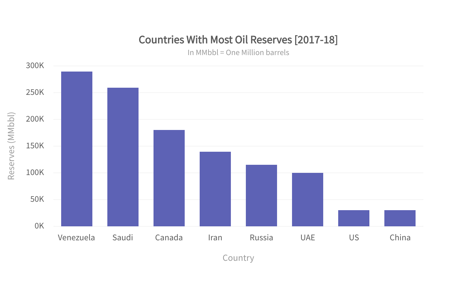

In [57]:
top10=ipl.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).index.tolist()
top10_df=ipl[ipl['batsman'].isin(top10)]

In [58]:
top10_score=top10_df.groupby('batsman')['batsman_runs'].sum().reset_index()
top10_score

,batsman,batsman_runs
0,AB de Villiers,3486
1,CH Gayle,3651
2,DA Warner,4014
3,G Gambhir,4132
4,MS Dhoni,3560
5,RG Sharma,4207
6,RV Uthappa,3778
7,S Dhawan,3561
8,SK Raina,4548
9,V Kohli,4423


In [64]:
# plot Bar Graph
trace = go.Bar(x=top10_score['batsman'], 
               y=top10_score['batsman_runs'])

data = [trace]

layout = go.Layout(title='Top 10 Batsman', 
                   xaxis={'title':'Batsman'}, 
                   yaxis={'title':'Runs'})

fig = go.Figure(data, layout)

fig.show()

# There are 3 types of Bar Graphs
1. Nested Bar Graph -> side by side 
2. Stacked Bar Graph -> added sum
3. Overlayed Bar Graph -> overlap graph

In [65]:
iw=top10_df.groupby(['batsman','inning'])['batsman_runs'].sum().reset_index()
mask=iw['inning']==1
mask2=iw['inning']==2
one=iw[mask]
two=iw[mask2]


one.rename(columns={'batsman_runs':'1st Innings'},inplace=True)
two.rename(columns={'batsman_runs':'2nd Innings'},inplace=True)

final=one.merge(two,on='batsman')[['batsman','1st Innings','2nd Innings']]

final

C:\Users\Aniket\AppData\Local\Temp\ipykernel_960\3773990239.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Aniket\AppData\Local\Temp\ipykernel_960\3773990239.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,batsman,1st Innings,2nd Innings
0,AB de Villiers,2128,1345
1,CH Gayle,2003,1623
2,DA Warner,2118,1896
3,G Gambhir,1699,2433
4,MS Dhoni,2232,1328
5,RG Sharma,2344,1863
6,RV Uthappa,1516,2262
7,S Dhawan,2262,1299
8,SK Raina,2647,1893
9,V Kohli,2391,2027


In [74]:
# plot 
trace1 = go.Bar(x=final['batsman'], 
               y=final['1st Innings'],
               name='1st Innings')

trace2 =  go.Bar(x=final['batsman'], 
                 y=final['2nd Innings'],
                 name='2nd Innings')

data = [trace1, trace2]

layout = go.Layout(title='Top 10 Batsman', 
                   xaxis={'title':'Batsman'}, 
                   yaxis={'title':'Runs'},
                   barmode='stack') # stack, overlay, nested

fig = go.Figure(data, layout)

fig.show()

# 4. Bubble Plot
Again an extension of Scatter plot. with some additional informations

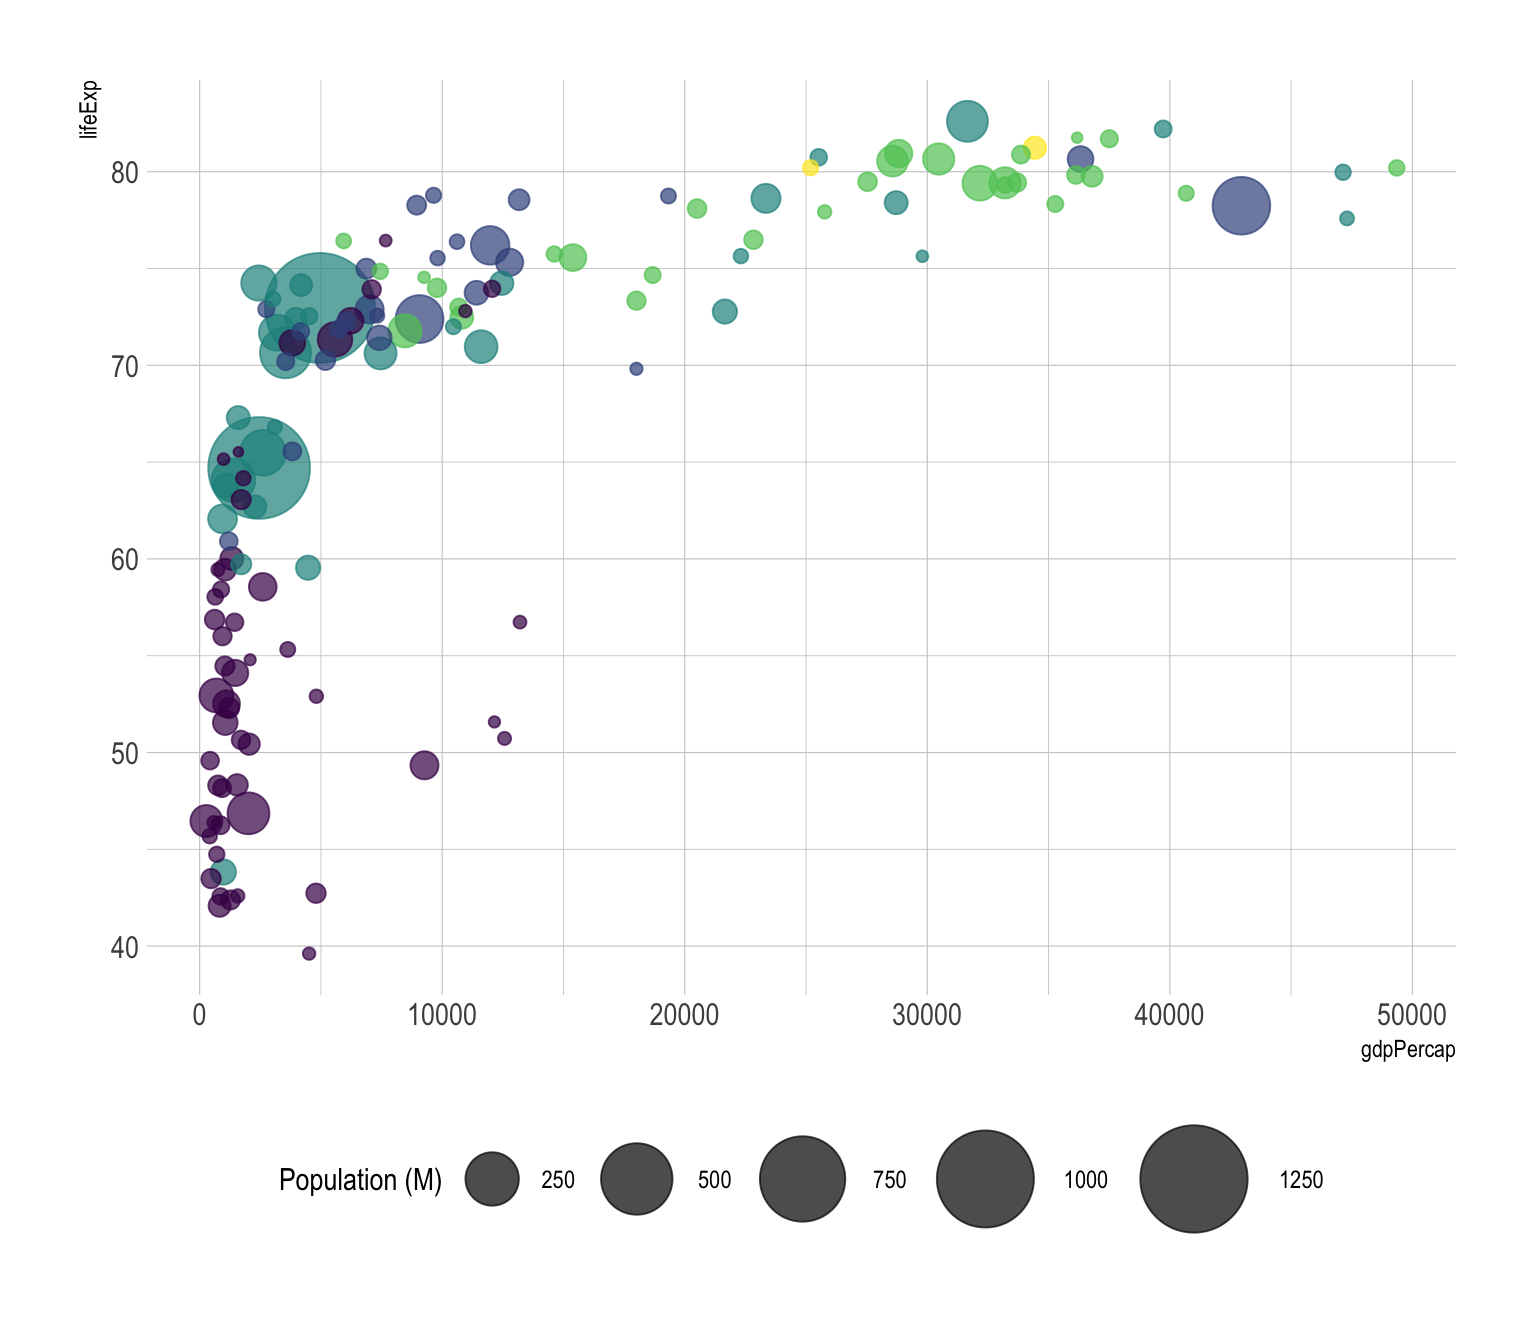

In [83]:
new_ipl=new_ipl[new_ipl['batsman_runs']==6]

six=new_ipl.groupby('batsman')['batsman_runs'].count().reset_index()

x=avg.merge(six,on='batsman')

x.head()

,batsman,avg,batsman_runs_x,batsman_runs_y
0,AB de Villiers,38.307692,145.129059,158
1,AC Gilchrist,27.223684,133.054662,92
2,AJ Finch,27.186441,126.299213,59
3,AM Rahane,33.593407,117.486549,60
4,AT Rayudu,27.146067,123.014257,79


In [85]:
trace =  go.Scatter(x=x['avg'],
                    y=x['batsman_runs_x'],
                    marker={'size':x['batsman_runs_y']},
                    mode='markers',
                    hovertext=x['batsman'])

data = [trace]

layout = go.Layout(title='Bubble Chart', 
                   xaxis={'title':'Average'}, 
                   yaxis={'title':'SR'},
                   barmode='stack') # stack, overlay, nested

fig = go.Figure(data, layout)

fig.show()

# 5. Box Plot
A box and whisker plot—also called a box plot—displays the five-number summary of a set of data.

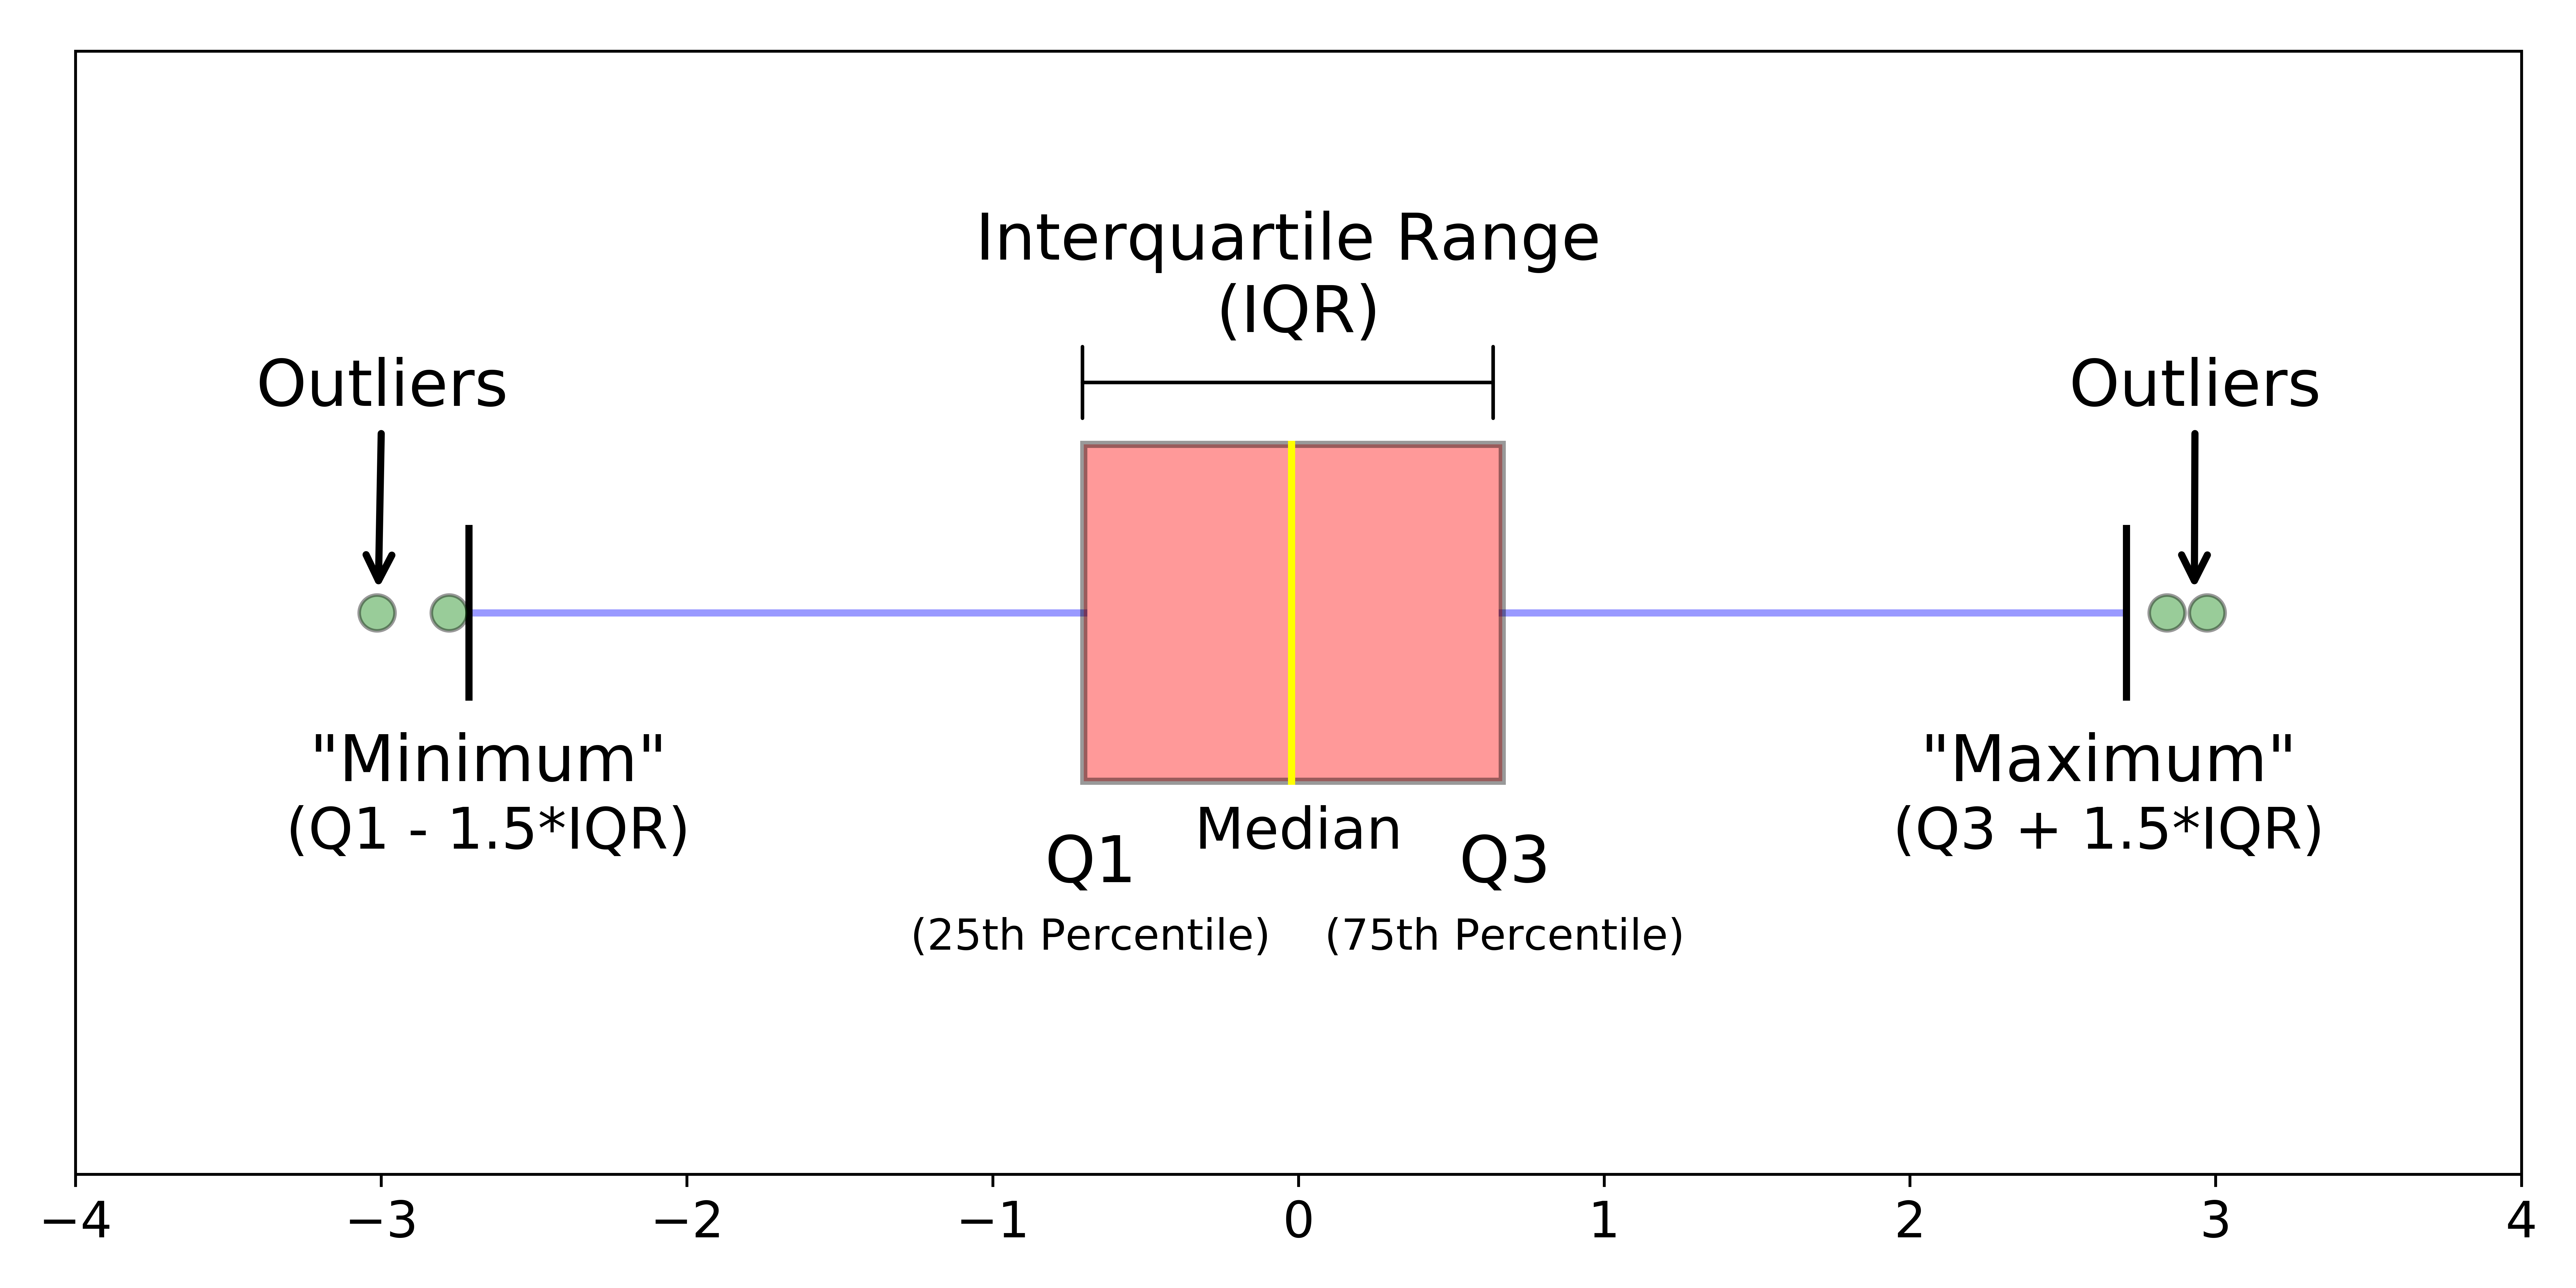

In [87]:
match_agg=delivery.groupby(['match_id'])['total_runs'].sum().reset_index()
season_wise=match_agg.merge(match,left_on='match_id',right_on='id')[['match_id','total_runs','season']]
season_wise.head()

,match_id,total_runs,season
0,1,379,2017
1,2,371,2017
2,3,367,2017
3,4,327,2017
4,5,299,2017


In [92]:
# Plot Box Plot here
trace1 =  go.Box(x=season_wise[season_wise['season']==2017]['total_runs'], 
                name='2017',
                marker={'color':'green'})

trace2 =  go.Box(x=season_wise[season_wise['season']==2008]['total_runs'], 
                name='2008',
                marker={'color':'red'})

data = [trace1,trace2]

layout = go.Layout(title='Total Runs', 
                   xaxis={'title':'Total Score'})

fig = go.Figure(data, layout)

fig.show()

# 6. Histograms
A histogram is a plot that lets you discover, and show, the underlying frequency distribution (shape) of a set of continuous data.

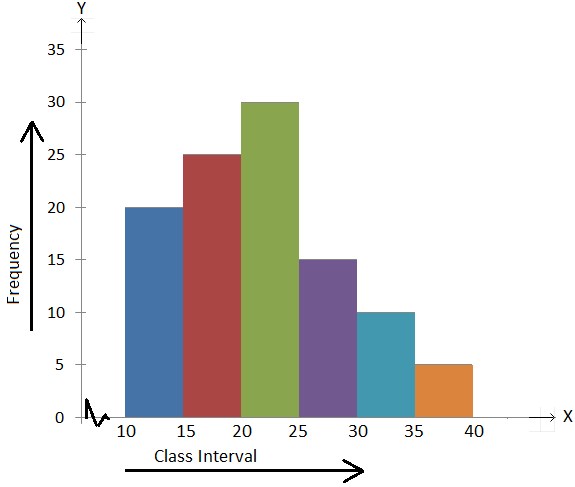

In [99]:
x=delivery.groupby('batsman')['batsman_runs'].count()>150
x=x[x].index.tolist()

new=delivery[delivery['batsman'].isin(x)]


runs=new.groupby('batsman')['batsman_runs'].sum()
balls=new.groupby('batsman')['batsman_runs'].count()

sr=(runs/balls)*100

sr=sr.reset_index()
sr.head()

,batsman,batsman_runs
0,A Ashish Reddy,142.857143
1,A Mishra,89.005236
2,A Symonds,124.711908
3,AA Jhunjhunwala,99.541284
4,AB Agarkar,111.875000


In [117]:
trace =  go.Histogram(x=sr.batsman_runs,
                      marker={'color':'yellow'},
                      xbins={'size':2,'start':50,'end':100})

data = [trace]

layout = go.Layout(title='Strike Rate Analysis', 
                   xaxis={'title':'Strike Rate'})

fig = go.Figure(data, layout)

fig.show()

# 7. Distplots 

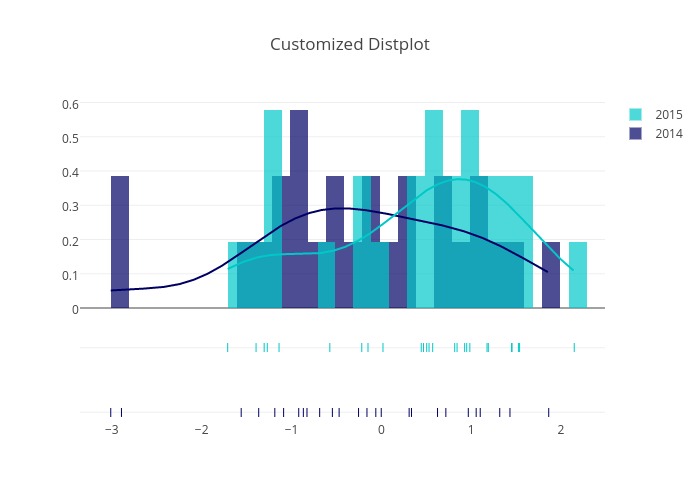

In [97]:
# plot distplot

import plotly.figure_factory as ff

hist_data = [avg['avg'], avg['batsman_runs']]

group_labels = ['Average', 'Strike Rate']

fig = ff.create_distplot(hist_data, group_labels, bin_size=[10,20])

fig.show()

# 8. Heatmaps
A heat map is a graphical representation of data where the individual values contained in a matrix are represented as colors.

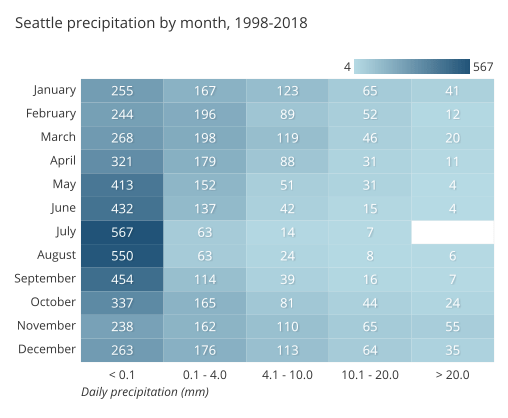

In [118]:
six=delivery[delivery['batsman_runs']==6]
six=six.groupby(['batting_team','over'])['batsman_runs'].count().reset_index()

six

,batting_team,over,batsman_runs
0,Chennai Super Kings,1,5
1,Chennai Super Kings,2,17
2,Chennai Super Kings,3,37
3,Chennai Super Kings,4,34
4,Chennai Super Kings,5,41
...,...,...,...
271,Sunrisers Hyderabad,16,22
272,Sunrisers Hyderabad,17,18
273,Sunrisers Hyderabad,18,37
274,Sunrisers Hyderabad,19,42


In [119]:
# plot heatmap
trace =  go.Heatmap(x=six.batting_team,
                    y=six.over,
                    z=six.batsman_runs)

data = [trace]

layout = go.Layout(title='Sixes Heatmap')

fig = go.Figure(data, layout)

fig.show()

In [120]:
dots=delivery[delivery['batsman_runs']==0]
dots=six.groupby(['batting_team','over'])['batsman_runs'].count().reset_index()

dots

,batting_team,over,batsman_runs
0,Chennai Super Kings,1,1
1,Chennai Super Kings,2,1
2,Chennai Super Kings,3,1
3,Chennai Super Kings,4,1
4,Chennai Super Kings,5,1
...,...,...,...
271,Sunrisers Hyderabad,16,1
272,Sunrisers Hyderabad,17,1
273,Sunrisers Hyderabad,18,1
274,Sunrisers Hyderabad,19,1


In [122]:
from plotly import tools

trace1=go.Heatmap(x=six['batting_team'],y=six['over'],
                 z=six['batsman_runs'].values.tolist())

trace2=go.Heatmap(x=dots['batting_team'],y=dots['over'],
                 z=dots['batsman_runs'].values.tolist())


fig=tools.make_subplots(rows=1,cols=2,subplot_titles=["6's","0's"], shared_yaxes=True)

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)

fig.show()